<a href="https://colab.research.google.com/github/kylefrankel/classification/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from scipy.stats import entropy
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython import display
import networkx as nx

In [ ]:
#2a
df =  pd.read_csv('https://drive.google.com/uc?export=download&id=1oQMcpoR3QC7w_sWIbtyid2N2j0o49_pk')
df


,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [ ]:
dfnoID=df[["age","income","children","gender","region","married","car","savings_acct",'current_acct',"mortgage","pep"]]
dfnoID

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


In [ ]:
X=dfnoID[["age","income","children","gender","region","married","car","savings_acct",'current_acct',"mortgage"]].values
print(X)


[[48 17546.0 1 ... 'NO' 'NO' 'NO']
 [40 30085.1 3 ... 'NO' 'YES' 'YES']
 [51 16575.4 0 ... 'YES' 'YES' 'NO']
 ...
 [31 15976.3 0 ... 'YES' 'NO' 'NO']
 [29 14711.8 0 ... 'YES' 'NO' 'YES']
 [38 26671.6 0 ... 'NO' 'YES' 'YES']]


In [ ]:
X=dfnoID[["age","income","children","gender","region","married","car","savings_acct",'current_acct',"mortgage"]]
print(X)

     age    income  children  gender  ...  car savings_acct current_acct mortgage
0     48  17546.00         1  FEMALE  ...   NO           NO           NO       NO
1     40  30085.10         3    MALE  ...  YES           NO          YES      YES
2     51  16575.40         0  FEMALE  ...  YES          YES          YES       NO
3     23  20375.40         3  FEMALE  ...   NO           NO          YES       NO
4     57  50576.30         0  FEMALE  ...   NO          YES           NO       NO
..   ...       ...       ...     ...  ...  ...          ...          ...      ...
595   61  47025.00         2  FEMALE  ...  YES          YES          YES      YES
596   30   9672.25         0  FEMALE  ...  YES          YES          YES       NO
597   31  15976.30         0  FEMALE  ...  YES          YES           NO       NO
598   29  14711.80         0    MALE  ...   NO          YES           NO      YES
599   38  26671.60         0    MALE  ...  YES           NO          YES      YES

[600 rows x 10 

In [ ]:
Xdum = pd.get_dummies(X)
Xdum

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.00,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.10,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.40,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.40,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.30,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,47025.00,2,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
596,30,9672.25,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
597,31,15976.30,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
598,29,14711.80,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1


In [ ]:
y=dfnoID.pep
y

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
595     NO
596     NO
597    YES
598     NO
599    YES
Name: pep, Length: 600, dtype: object

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdum, y, test_size=.2, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (480, 19)
ytrain.shape: (480,)
Xtest.shape: (120, 19)
ytest.shape: (120,)


In [ ]:
#2b
xtrainnorm= (Xtrain-Xtrain.min())/(Xtrain.max()-(Xtrain.min()))
xtrainnorm

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
118,0.428571,0.186476,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
362,0.775510,0.417656,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
55,0.693878,0.758404,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
90,0.387755,0.327643,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
390,0.775510,0.692025,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.142857,0.281830,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
9,0.734694,0.316371,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
359,0.693878,0.289804,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
192,0.938776,0.780654,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
xtestnorm= (Xtest-Xtest.min())/(Xtest.max()-(Xtest.min()))
xtestnorm

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
434,0.591837,0.310139,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
122,0.367347,0.271609,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
224,0.795918,0.771909,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
479,0.571429,0.660427,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
205,0.000000,0.161305,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.142857,0.239329,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
386,0.632653,0.183683,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
437,0.938776,0.454290,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
313,0.000000,0.190924,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:

model=KNeighborsClassifier(n_neighbors=30,metric="manhattan")
model.fit(xtrainnorm,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
ypred=model.predict(xtestnorm)

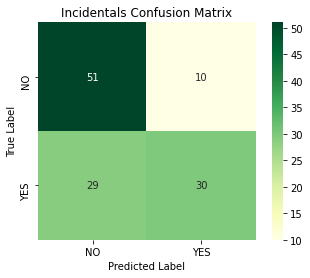

In [ ]:
# Display confusion matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          NO       0.64      0.84      0.72        61
         YES       0.75      0.51      0.61        59

    accuracy                           0.68       120
   macro avg       0.69      0.67      0.66       120
weighted avg       0.69      0.68      0.67       120



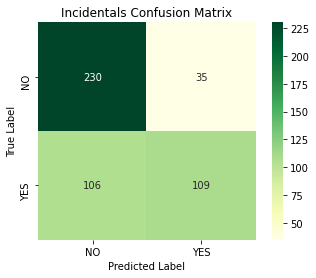

              precision    recall  f1-score   support

          NO       0.68      0.87      0.77       265
         YES       0.76      0.51      0.61       215

    accuracy                           0.71       480
   macro avg       0.72      0.69      0.69       480
weighted avg       0.72      0.71      0.69       480



In [ ]:
ypred2=model.predict(xtrainnorm)
cm = confusion_matrix(ytrain, ypred2)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()
print(classification_report(ytrain, ypred2))

2b.The numbers closer to 30 neigbours were the best parameters, although after 40 neighbours the recall, precision and accuracy lowered. Overall our data was 68% accurate. The model correctly predicted no 64% of the time and for yes it predicted correctly 75% of the time. For recall, the model correctly predicted no's 84% of the time and yes 61% of the time. 

In [ ]:
#2c
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(Xtrain, ytrain)

              precision    recall  f1-score   support

          NO       0.73      0.85      0.79        61
         YES       0.82      0.68      0.74        59

    accuracy                           0.77       120
   macro avg       0.77      0.77      0.76       120
weighted avg       0.77      0.77      0.76       120



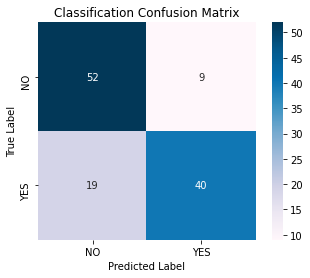

In [ ]:
model = RandomForestClassifier(n_estimators=12, random_state=0, criterion='entropy')
model=model.fit(xtrainnorm,ytrain)
ypred=model.predict(xtestnorm)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Classification Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

          NO       0.99      0.99      0.99       265
         YES       0.99      0.98      0.99       215

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



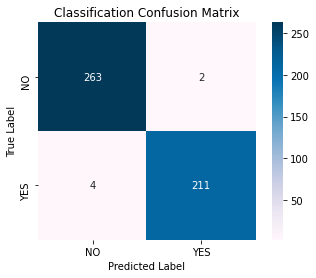

In [ ]:

model = RandomForestClassifier(n_estimators=12, random_state=0, criterion='entropy')
model=model.fit(xtrainnorm,ytrain)
ypred2=model.predict(xtrainnorm)
cm = confusion_matrix(ytrain, ypred2)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)
from sklearn.metrics import classification_report

print(classification_report(ytrain, ypred2))

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Classification Confusion Matrix')
plt.show()

In [ ]:
G=GaussianNB()
G.fit(xtrainnorm,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ypred=G.predict(xtestnorm)

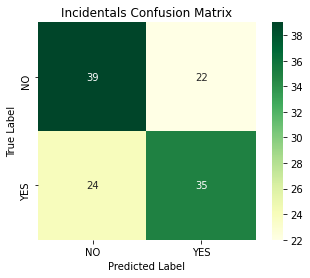

In [ ]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          NO       0.62      0.64      0.63        61
         YES       0.61      0.59      0.60        59

    accuracy                           0.62       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.62      0.62      0.62       120



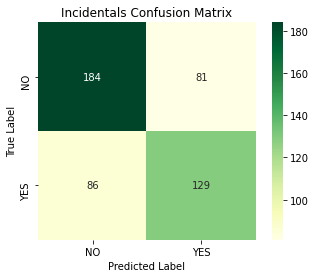

In [ ]:
ypred2=G.predict(xtrainnorm)
cm = confusion_matrix(ytrain, ypred2)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(ytrain, ypred2))

              precision    recall  f1-score   support

          NO       0.68      0.69      0.69       265
         YES       0.61      0.60      0.61       215

    accuracy                           0.65       480
   macro avg       0.65      0.65      0.65       480
weighted avg       0.65      0.65      0.65       480



2c. For the KNN, the second graph is overfitting because it is performing well in the training set but not as well in the test set. For the random forest model the model is extremely overfitted since the second model increased from 0.77 accuracy to 0.99. Lasty for the naive bayes the model is also slightly overfitted since the training set is performing better than the test set. 

2d.The random forest classifier has the best accuracy, precision and recall while predecting the model. The second best model was Kneighborsclassifier. Furthermore, random forest classifier is the model that overfitted the most when we fitted the trainning model will an overall accuracy of 99%.

In [ ]:
#3
df = 'https://drive.google.com/uc?export=download&id=1oTVNqgCY37iIglmJDmzL4JQH5sH9T9VE'
df = pd.read_csv(df)
df


,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,?,Private,2,Married,White,Male,53,<=50K


In [ ]:
#3a.i
missing='?'
df2=pd.read_csv('https://drive.google.com/uc?export=download&id=1oTVNqgCY37iIglmJDmzL4JQH5sH9T9VE',na_values=missing)
mean=df2['age'].mean()
df2['age'].fillna(mean,inplace=True)
print(df2)



            age workclass  education  ...     sex hours-per-week income
0     39.000000    Public         13  ...    Male             40  <=50K
1     50.000000  Self-emp         13  ...    Male             13  <=50K
2     38.000000   Private          9  ...    Male             40  <=50K
3     53.000000   Private          7  ...    Male             40  <=50K
4     28.000000   Private         13  ...  Female             40  <=50K
...         ...       ...        ...  ...     ...            ...    ...
9995  38.000000   Private         10  ...    Male             60   >50K
9996  25.000000   Private          9  ...  Female              8  <=50K
9997  21.000000   Private         10  ...    Male             40  <=50K
9998  38.449806   Private          2  ...    Male             53  <=50K
9999  39.000000   Private         10  ...  Female             40  <=50K

[10000 rows x 8 columns]


In [ ]:
df3=df2.dropna()

In [ ]:
df3=df3.rename(columns={'hours-per-week':'hpw'})
df3=df3.rename(columns={'marital-status':'ms'})
df3

,age,workclass,education,ms,race,sex,hpw,income
0,39.000000,Public,13,Single,White,Male,40,<=50K
1,50.000000,Self-emp,13,Married,White,Male,13,<=50K
2,38.000000,Private,9,Single,White,Male,40,<=50K
3,53.000000,Private,7,Married,Black,Male,40,<=50K
4,28.000000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.000000,Private,10,Married,White,Male,60,>50K
9996,25.000000,Private,9,Single,White,Female,8,<=50K
9997,21.000000,Private,10,Single,Black,Male,40,<=50K
9998,38.449806,Private,2,Married,White,Male,53,<=50K


In [ ]:
df3.describe()

,age,education,hpw
count,9412.000000,9412.000000,9412.000000
mean,38.366342,10.125266,41.080217
std,12.962039,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


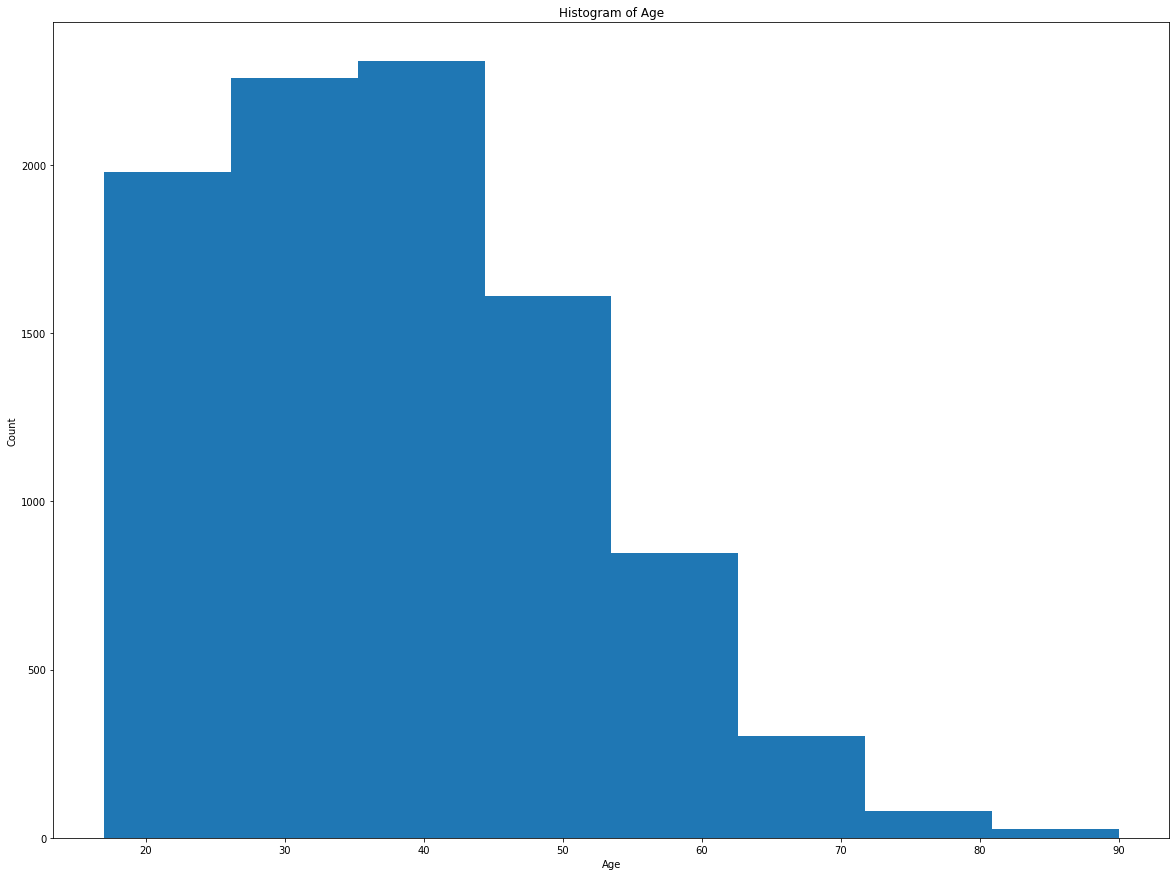

In [ ]:
#3a.ii
plt.figure(figsize=(20, 15))
plt.hist(df3.age, bins=8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

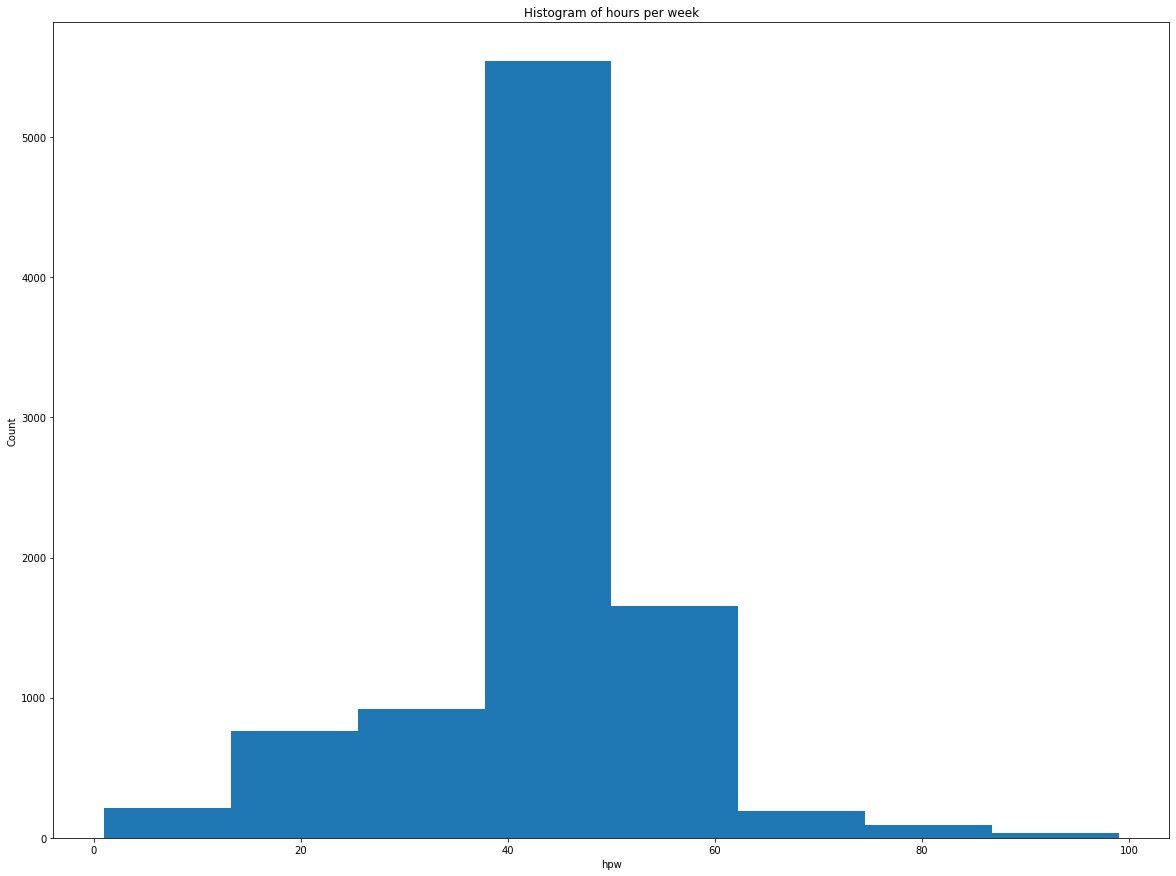

In [ ]:
plt.figure(figsize=(20, 15))
plt.hist(df3.hpw, bins=8)
plt.xlabel('hpw')
plt.ylabel('Count')
plt.title('Histogram of hours per week')
plt.show()

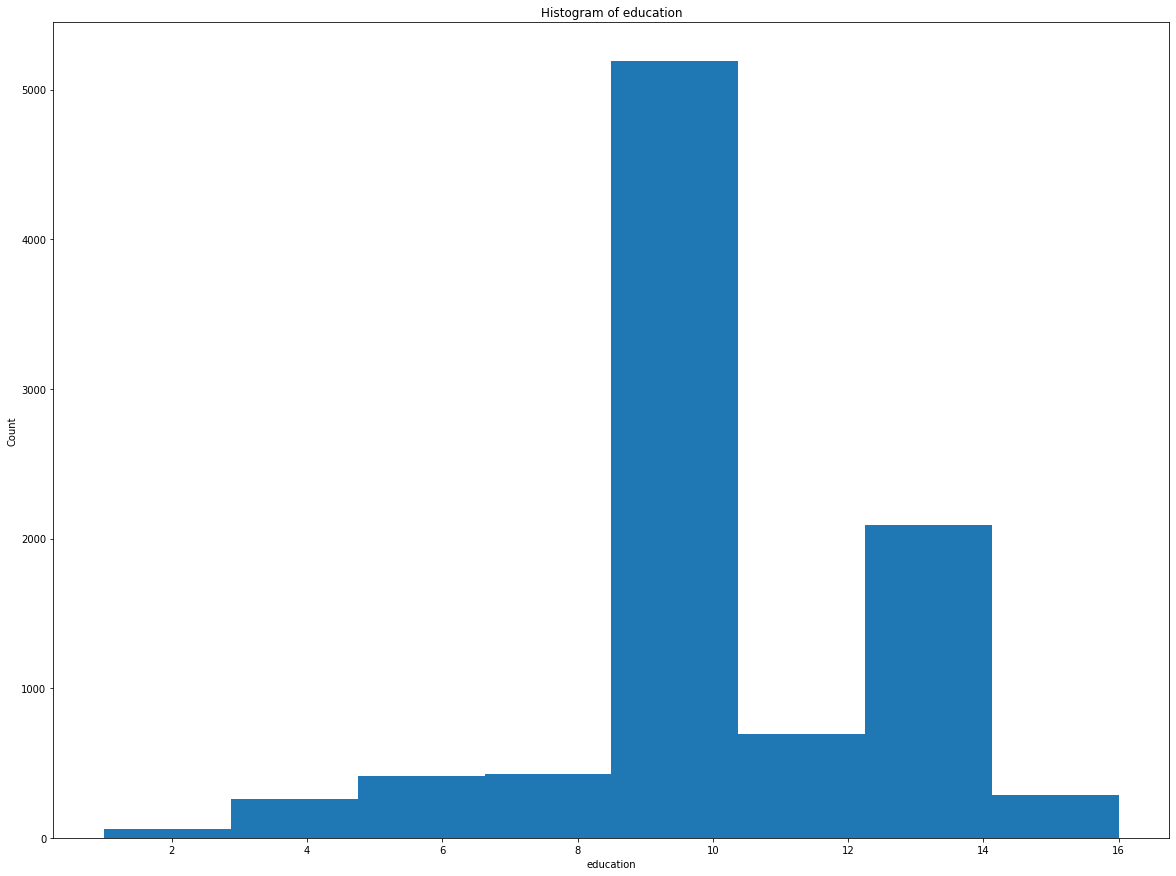

In [ ]:
plt.figure(figsize=(20, 15))
plt.hist(df3.education, bins=8)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Histogram of education')
plt.show()

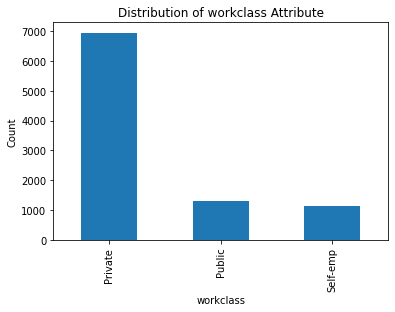

In [ ]:
plt.clf()
df.groupby(df3.workclass).count().age.plot(kind='bar')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.title('Distribution of workclass Attribute')
plt.show()

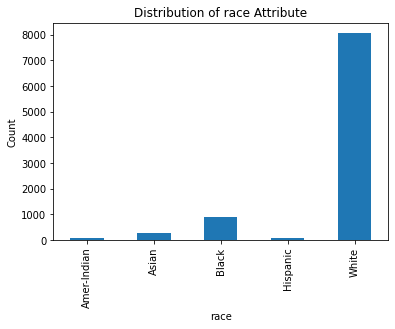

In [ ]:
plt.clf()
df.groupby(df3.race).count().age.plot(kind='bar')
plt.xlabel('race')
plt.ylabel('Count')
plt.title('Distribution of race Attribute')
plt.show()

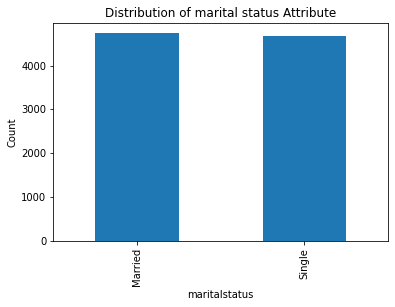

In [ ]:
plt.clf()
df.groupby(df3.ms).count().age.plot(kind='bar')
plt.xlabel('maritalstatus')
plt.ylabel('Count')
plt.title('Distribution of marital status Attribute')
plt.show()

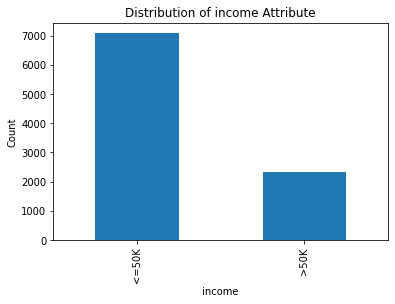

In [ ]:
plt.clf()
df.groupby(df3.income).count().age.plot(kind='bar')
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Distribution of income Attribute')
plt.show()

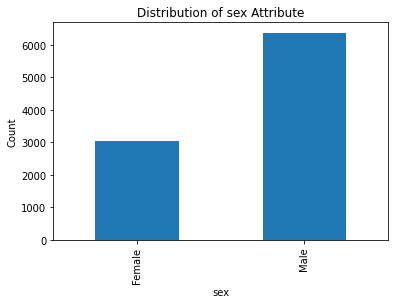

In [ ]:
plt.clf()
df.groupby(df3.sex).count().age.plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Distribution of sex Attribute')
plt.show()

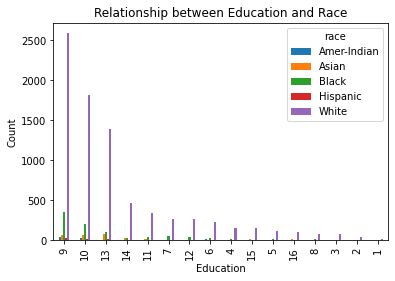

In [ ]:
#3.a.iii
bar = pd.crosstab(df3.education, df3.race,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False)
plt.title('Relationship between Education and Race')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

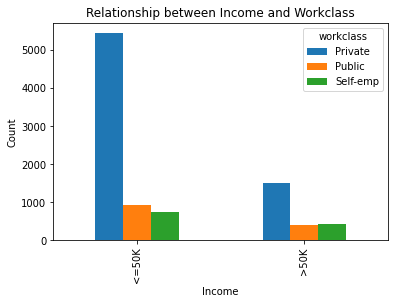

In [ ]:
bar = pd.crosstab(df3.income, df3.workclass,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False)
plt.title('Relationship between Income and Workclass')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

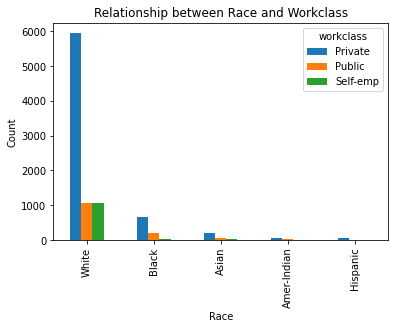

In [ ]:
bar = pd.crosstab(df3.race, df3.workclass,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False)
plt.title('Relationship between Race and Workclass')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

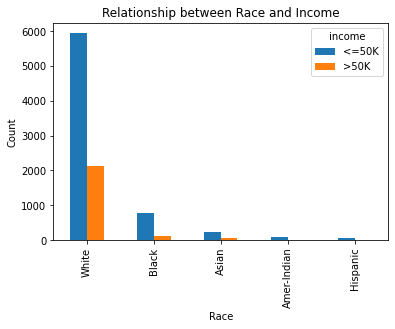

In [ ]:
bar = pd.crosstab(df3.race, df3.income,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False)
plt.title('Relationship between Race and Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [ ]:
lic=df3.income.str.count('<=50K').sum()
w=df3.race.str.count('White').sum()
b=df3.race.str.count('Black').sum()
a=df3.race.str.count('Asian').sum()
ai=df3.race.str.count('Amer-Indian').sum()
h=df3.race.str.count('Hispanic').sum()
newdfw = df3[(df3.race == "White") & (df3.income == ">50K")]
w2=newdfw.race.str.count('White').sum()
wlic=((w-w2)/w)*100
newdfb = df3[(df3.race == "Black") & (df3.income ==  ">50K")]
b2=newdfb.race.str.count('Black').sum()
blic=((b-b2)/b)*100
b2
newdfa = df3[(df3.race == "Asian") & (df3.income ==  ">50K")]
a2=newdfa.race.str.count('Asian').sum()
alic=((a-a2)/a)*100
newdfai = df3[(df3.race == "Amer-Indian") & (df3.income ==  ">50K")]
ai2=newdfai.race.str.count('Amer-Indian').sum()
ailic=((ai-ai2)/ai)*100
newdfh = df3[(df3.race == "Hispanic") & (df3.income ==  ">50K")]
h2=newdfh.race.str.count('Hispanic').sum()
hlic=((h-h2)/h)*100





In [ ]:
Race = ['White','Black','Asian','Amer-Indian','Hispanic']
Percentage = [wlic,blic,alic,ailic,hlic]

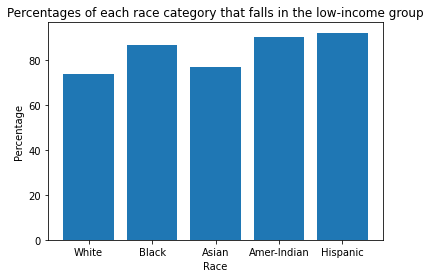

In [ ]:
plt.bar(Race,Percentage)
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Percentages of each race category that falls in the low-income group')
plt.show()

3a.iii. For higher education, it appears as if there is a higher percentage of the white race who attended compared to the other races. Additionally, a larger percentage of the sample population makes a lower income of <=50K. Also, not dependant on the income amount most people work in the Private sector for workclass. However, if you make more than 50K it appears that being Self-employed is better than the public workclass. Furthermore, for every race there are more people working on the private sector. Only for the white race we see that the public workclass and the self-employed workclass have an equal amount of people. For the other races, more people work in the private workclass, then public and then self-employed. For every race the mayority of the sample population makes less than or equal to 50K. For American-Idian and hispanics for the sample population bareley anyone makes more than 50K. This is shown in the percentages of each race category that falls in the low-income group.

3a. iv. Across the race attribute most people are a part of the low income category. Additionally, for the workclass attribute there is a higher chance you will make more than 50k if you are a part of the private workclass. However, throughout all workclasses the mayority of the sample population makes less than or equal to 50K no matter the workclass.

In [ ]:
#3b
x=df3[['age','workclass','education','ms','race','sex','hpw']]


In [ ]:
#3b.i

Xdum = pd.get_dummies(x)
Xdum





,age,education,hpw,workclass_Private,workclass_Public,workclass_Self-emp,ms_Married,ms_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39.000000,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50.000000,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38.000000,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53.000000,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28.000000,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38.000000,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9996,25.000000,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9997,21.000000,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9998,38.449806,2,53,1,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
y=df3[['income']]
ydum = pd.get_dummies(y)
ydum
ydum=ydum.rename(columns={'income_>50K':'highincome'})
ydum=ydum.rename(columns={'income_<=50K':'lowincome'})
ydum=ydum.drop('lowincome',axis=1)
ydum

,highincome
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,0


In [ ]:
#3b.ii
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdum, ydum, test_size=.2, random_state=0)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (7529, 15)
ytrain.shape: (7529, 1)
Xtest.shape: (1883, 15)
ytest.shape: (1883, 1)


In [ ]:
xtrainnorm= (Xtrain-Xtrain.min())/(Xtrain.max()-(Xtrain.min()))
xtrainnorm

,age,education,hpw,workclass_Private,workclass_Public,workclass_Self-emp,ms_Married,ms_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8722,0.123288,0.800000,0.397959,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6057,0.273973,0.533333,0.397959,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9395,0.191781,0.533333,0.397959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1804,0.328767,0.533333,0.397959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2303,1.000000,0.600000,0.346939,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393,0.452055,0.600000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9805,0.178082,0.600000,0.244898,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5197,0.630137,0.800000,0.346939,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3487,0.369863,0.533333,0.397959,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
xtestnorm= (Xtest-Xtest.min())/(Xtest.max()-(Xtest.min()))
xtestnorm

,age,education,hpw,workclass_Private,workclass_Public,workclass_Self-emp,ms_Married,ms_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
6874,0.000000,0.333333,0.072917,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9984,0.150685,0.333333,0.468750,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4093,0.191781,0.866667,0.385417,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3658,0.054795,0.600000,0.281250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4281,0.643836,0.200000,0.281250,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,0.493151,0.533333,0.489583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2595,0.246575,0.733333,0.218750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4814,0.178082,0.533333,0.385417,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9004,0.328767,0.600000,0.385417,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
model=KNeighborsClassifier(n_neighbors=25,metric='euclidean')
model.fit(xtrainnorm,ytrain)
ypred=model.predict(xtestnorm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


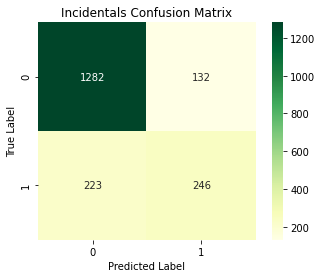

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1414
           1       0.65      0.52      0.58       469

    accuracy                           0.81      1883
   macro avg       0.75      0.72      0.73      1883
weighted avg       0.80      0.81      0.80      1883



In [ ]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()
print(classification_report(ytest, ypred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1414
           1       0.59      0.50      0.54       469

    accuracy                           0.79      1883
   macro avg       0.72      0.69      0.70      1883
weighted avg       0.78      0.79      0.78      1883



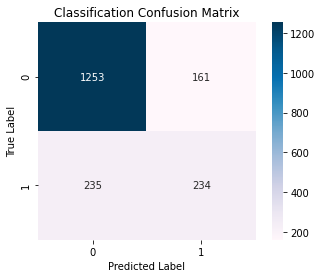

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(xtrainnorm, ytrain)
model = RandomForestClassifier(n_estimators=12, random_state=0, criterion='entropy')
model=model.fit(xtrainnorm,ytrain)
ypred=model.predict(xtestnorm)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Classification Confusion Matrix')
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


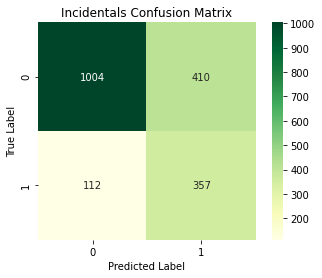

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1414
           1       0.47      0.76      0.58       469

    accuracy                           0.72      1883
   macro avg       0.68      0.74      0.69      1883
weighted avg       0.79      0.72      0.74      1883



In [ ]:
G=GaussianNB()
G.fit(xtrainnorm,ytrain)
ypred=G.predict(xtestnorm)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()
print(classification_report(ytest, ypred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


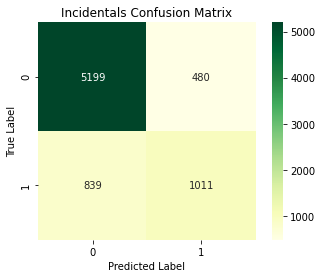

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5679
           1       0.68      0.55      0.61      1850

    accuracy                           0.82      7529
   macro avg       0.77      0.73      0.75      7529
weighted avg       0.82      0.82      0.82      7529



In [ ]:
model=KNeighborsClassifier(n_neighbors=25,metric='euclidean')
model.fit(xtrainnorm,ytrain)
ypred=model.predict(xtrainnorm)
cm = confusion_matrix(ytrain, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()
print(classification_report(ytrain, ypred))


In [ ]:
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='uniform')
param_grid = {'n_neighbors': np.arange(1, 28),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, param_grid, cv=5, verbose=1)
grid.fit(xtrainnorm, ytrain)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selec

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}

In [ ]:
model = grid.best_estimator_
model.fit(xtrainnorm, ytrain)
ypred = model.predict(xtrainnorm)
print(classification_report(ytrain, ypred))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5679
           1       0.69      0.55      0.61      1850

    accuracy                           0.83      7529
   macro avg       0.78      0.74      0.75      7529
weighted avg       0.82      0.83      0.82      7529



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5679
           1       0.88      0.83      0.86      1850

    accuracy                           0.93      7529
   macro avg       0.91      0.90      0.91      7529
weighted avg       0.93      0.93      0.93      7529



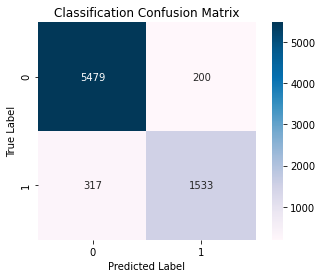

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(xtrainnorm, ytrain)
model = RandomForestClassifier(n_estimators=12, random_state=0, criterion='entropy')
model=model.fit(xtrainnorm,ytrain)
ypred=model.predict(xtrainnorm)
cm = confusion_matrix(ytrain, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)
from sklearn.metrics import classification_report

print(classification_report(ytrain, ypred))

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Classification Confusion Matrix')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


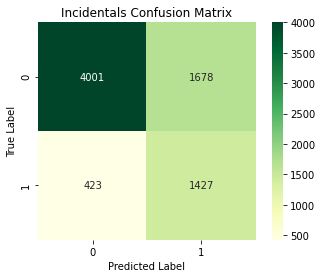

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      5679
           1       0.46      0.77      0.58      1850

    accuracy                           0.72      7529
   macro avg       0.68      0.74      0.68      7529
weighted avg       0.80      0.72      0.74      7529



In [ ]:
G=GaussianNB()
G.fit(xtrainnorm,ytrain)
ypred=G.predict(xtrainnorm)
cm = confusion_matrix(ytrain, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Incidentals Confusion Matrix')
plt.show()
print(classification_report(ytrain, ypred))

3.b.iii. For the KNN model for the first table the overall accuracy is .81. Meanwhile for the second table the overall accuracy is 0.83. This means that the model is only sligtly overfitting. Secondly, for the Random Forest Classifier, the accuracy for the first table was 0.79, and the accuracy for our second table is 0.93. This means that our model is extremely overfitted. Finally, for the naive bayes our model showed an accuracy for 0.72 for the first table and 0.72 for the second table. This means that our model is not overfitting or underfitting. 